In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from skimage import color, io

import numpy as np

In [2]:
# class Rgb2LabTensor(object):
    
#     def __init__(self):
#         srgb_profile = ImageCms.createProfile("sRGB")
#         lab_profile  = ImageCms.createProfile("LAB")
#         self.rgb2lab_transform = ImageCms.buildTransformFromOpenProfiles(srgb_profile, lab_profile, "RGB", "LAB")


#     def rgb2lab(self, im):
#         pass


#     def __call__(self, im):

#         if im.mode != "RGB":
#             im = im.convert("RGB")
#         lab_im = ImageCms.applyTransform(im, self.rgb2lab_transform)

#         return lab_im

In [3]:
# class SplitLab(object):
#     def __call__(self, img_lab):
#         L  = img_lab[:1,:,:]
#         ab = img_lab[1:,:,:]
#         return L, ab

In [4]:
def net_out2rgb(L, ab_out):
    """Translates the net output back to an image.

    More specifically: unnormalizes both L and ab_out channels, stacks them
    into an image in LAB color space and converts back to RGB.
  
    Args:
        L: original L channel of an image
        ab_out: ab channel which was learnt by the network
    
    Retruns: 
        3 channel RGB image
    """
    # Convert to numpy and unnnormalize
    L = L.numpy() * 100.0
    ab_out = np.floor(ab_out.numpy() * 255.0) - 127.0 
    
    # L and ab_out are tenosr i.e. are of shape of
    # Height x Width x Channels
    # We need to transpose axis back to HxWxC
    L = L.transpose((1, 2, 0))
    ab_out = ab_out.transpose((1, 2, 0))

    # Stack layers  
    lab_stack = np.dstack((L, ab_out))
    
    return color.lab2rgb(lab_stack)

In [8]:
class info(object):
    def __call__(self, sample):
        print("===== INFO =====")
        print(type(sample))
        print(sample.min())
        print(sample.max())
        
        L  = sample[:1,:,:]
        ab = sample[1:,:,:]
        
        print("L.max() {}".format(L.max))
        print("L.min() {}".format(L.min))
        
        return sample
    
class scikitr_rgb2lab(object):
    def __call__(self, image):
        return color.rgb2lab(image)

In [9]:
traindir = "../data/playground/"

train_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(root=traindir, 
            transform=transforms.Compose([
#                 transforms.RandomResizedCrop(224),
#                 Rgb2LabTensor(),
                scikitr_rgb2lab(),
#                 info(),
                
                transforms.ToTensor(),
                transforms.Normalize([0.0, 0.0, 0.0], [100.0, 128.0, 128.0]),
                info()
                ]),
            loader=io.imread
    ),
        batch_size=4, shuffle=True,
        num_workers=0, pin_memory=True)


===== INFO =====
<class 'torch.Tensor'>
tensor(-0.2626, dtype=torch.float64)
tensor(0.9993, dtype=torch.float64)
L.max() <built-in method max of Tensor object at 0x7f928cef8360>
L.min() <built-in method min of Tensor object at 0x7f928cef8360>
===== INFO =====
<class 'torch.Tensor'>
tensor(-0.1702, dtype=torch.float64)
tensor(0.9971, dtype=torch.float64)
L.max() <built-in method max of Tensor object at 0x7f928cef8750>
L.min() <built-in method min of Tensor object at 0x7f928cef8750>
===== INFO =====
<class 'torch.Tensor'>
tensor(-0.2713, dtype=torch.float64)
tensor(0.9988, dtype=torch.float64)
L.max() <built-in method max of Tensor object at 0x7f928cef88b8>
L.min() <built-in method min of Tensor object at 0x7f928cef88b8>
===== INFO =====
<class 'torch.Tensor'>
tensor(-0.2945, dtype=torch.float64)
tensor(0.9935, dtype=torch.float64)
L.max() <built-in method max of Tensor object at 0x7f928cef89d8>
L.min() <built-in method min of Tensor object at 0x7f928cef89d8>
batch = 0

torch.Size([4, 3,

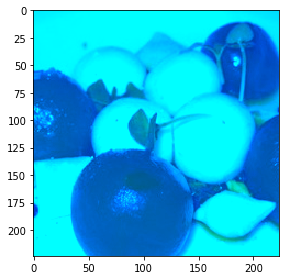

Exception: 

In [10]:
for i, (lab_img, target) in enumerate(train_loader):
    print("batch = {}\n".format(i))
    print(lab_img.shape)
    
    for im in lab_img:
        print(type(im))
        print(im.size())
        L  = im[:1,:,:]
        ab = im[1:,:,:]
        print(L.shape)
        print(ab.shape)
        io.imshow(net_out2rgb(L, ab))
        io.show()
        raise Exception
    print()
    print()    